# Cleaning and Preparing Data with Pandas


## Manipulating data in the NCAA games data set

**Pandas** (derived from the term "**pan**el **da**ta") is a popular Python library for processing and analyzing data, particularly in a tabular format. Think of it as a spreadsheet in a programming environment, packing a lot more computational and memory efficiency with all the automation benefits of Python. Pandas can do virtually any of the tasks you can do in a spreadsheet and extends easily to tasks like processing data, extract-transform-load (ETL), data cleaning, machine learning preparation, and data viewing stored in formats such as CSV, JSON, and SQL. 

This training will focus on data cleaning with Pandas, but we will review a few Pandas basics in this section.

## Announcement: What's New in Pandas 2.0? 

The largest change in Pandas 2.0 is the introduction of the Apache Arrow backend, which is a computationally efficient library for handling columnar data with modern CPU and GPU capabilities. 

This data-processing role was done by NumPy in the past, including the handling of Pandas datatypes. You can explicitly tell Pandas to use Arrow data types if you want to leverage the Apache Arrow backend now. 

```python
pd.Series ([1, 2, 3, 4], type= 'int64 [pyarrow]')
pd.Series (['foo', 'bar','foobar'], dtype= 'string [pyarrow]')
```

You can also instruct Pandas to use Arrow by default: 

```python
pd.options.mode.type_backend = 'pyarrow'
```

Pandas with Arrow will also more effectively handle null values and data types, as well as bring in greater computational efficiency. It comes with interoperability features with other data processing platforms as well. 

> VIDEO: https://www.youtube.com/watch?v=cSLPyRI_ZD8
>
> BLOG: https://datapythonista.me/blog/pandas-20-and-the-arrow-revolution-part-i

We are not going to use Apache Arrow in this session, but perhaps we will see more of its usage in the future! 

## Setting Up Pandas

Pandas should already come packaged with the Anaconda distribution. But if you ever need to install Pandas you can run this command:  

```
conda install pandas 
```

If using a standard Python distribution, use `pip`. 

```
pip install pandas
```

Typically when using Pandas you will use an *alias* to rename the `pandas` package, typically with the name `pd`. This is to prevent clashing with similarly-named functions in other libraries (e.g. NumPy, Python's standard library) while requiring less typing. Here is typically how we alias the import of Pandas. 

In [31]:
import pandas as pd

It is common to use NumPy (a numeric computing Python library) in conjunction with Pandas. It gets aliased in a similar manner but is instead called `np`. 

In [32]:
import numpy as np 

## Inspecting the Dataset

We are going to use Bob Weiland's great NCAA dataset for our demonstration of data cleaning today. 

https://github.com/bbwieland/ncaa-projections

Let's set Pandas to display all columns. Let's directly grab the `KenPomGames.csv` and load it into a dataframe. 

In [33]:
pd.set_option('display.max_columns', None)

data_url = "https://raw.githubusercontent.com/bbwieland/ncaa-projections/main/data/KenPomGames.csv"
players_url = "https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/unprocessed/ncaa_players.csv" 

df = pd.read_csv(data_url)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


Looking at this data we can see that there is some team ranking data for the NCAA, as well as some projected wins and losses. We should probably get some more context about this data to see what's going on. 

> Data needs context, get the documentation! Data can only tell so much about itself without an expert's knowledge to interpret it. 

Bob scraped this data to create this NCAA Projection application. He created some team rankings along with their offensive ranking and defensive ranking. There is a lot of documentation and context what is being achieved with this data, the definitions, and the methodology used. 

https://bbwieland.shinyapps.io/ncaa-projection-app/

Bob uses this dataset to project wins and losses between different teams, but we are going to focus on data cleaning. Like any dataset, you will need to understand what the data shows and its domain to clean it. That means having a clear understanding of not just the NCAA system but also the ranking and forecasting methodology that the dataset will be used for. We can only do so much of that here in the interest of time, so we will focus mostly on the data cleaning tools. 

## Comparing to Bob's Cleaned Dataset 

In [34]:
cleaned_data_url = "https://raw.githubusercontent.com/bbwieland/ncaa-projections/main/data/KenPomGamesCleaned.csv"

df_cleaned = pd.read_csv(cleaned_data_url).iloc[:,:-5].set_index('team')
pd.concat([df,df_cleaned]).drop_duplicates(keep=False).loc['Houston']

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
Houston,7.0,NaN,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
Houston,6.0,NaN,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
Houston,4.0,NaN,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
Houston,4.0,NaN,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
Houston,3.0,NaN,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
Houston,2.0,NaN,75.0,Kent St.,"W, 49-44",70.0,0.0,NaN,Home,6.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 26,20221126,6,0,0,0,2022-11-26,1114.0,NaN
Houston,2.0,NaN,179.0,Norfolk St.,"W, 100-52",64.0,0.0,NaN,Home,7.0,0.0,NaN,NaN,False,Regular,2023,Tue Nov 29,20221129,7,0,0,0,2022-11-29,1212.0,NaN
Houston,1.0,NaN,8.0,Saint Mary's,"W, 53-48",56.0,0.0,NaN,Semi-Home,8.0,0.0,NaN,NaN,False,Regular,2023,Sat Dec 3,20221203,8,0,0,0,2022-12-03,1464.0,A
Houston,1.0,NaN,226.0,North Florida,"W, 76-42",61.0,0.0,NaN,Home,9.0,0.0,NaN,NaN,False,Regular,2023,Tue Dec 6,20221206,9,0,0,0,2022-12-06,1548.0,NaN
Houston,1.0,NaN,3.0,Alabama,"L, 71-65",72.0,0.0,NaN,Home,9.0,1.0,NaN,NaN,False,Regular,2023,Sat Dec 10,20221210,9,1,0,0,2022-12-10,1691.0,A


# Section 1 - Selecting Rows and Columns

## Understanding iloc and loc 

There are two critical functions to know in Pandas when you are selecting by index: `loc` and `iloc`. It is very easy to confuse these two, as the first works on labels and the second for numeric indices. 

Here is where people get confused. Let's say we want to select the first record. We can use both `loc` and `iloc` to do this, and they both produce the same answer.

> Remember that Python and Pandas uses 0-based indexing, meaning the first element will start at index 0 rather than index 1! 

In [35]:
df.iloc[0]

team_rk                            7.0
team                           Houston
opponent_rk                      219.0
opponent             Northern Colorado
result                        W, 83-36
poss                              64.0
ot                                 0.0
pre_wp                             NaN
location                          Home
w                                  1.0
l                                  0.0
w_conference                       NaN
l_conference                       NaN
conference_game                  False
postseason                     Regular
year                              2023
day_date                     Mon Nov 7
game_date                     20221107
w_proj                               1
l_proj                               0
w_conference_proj                    0
l_conference_proj                    0
date                        2022-11-07
game_id                           87.0
tiers_of_joy                       NaN
Name: 0, dtype: object

In [36]:
df.loc[0]

team_rk                            7.0
team                           Houston
opponent_rk                      219.0
opponent             Northern Colorado
result                        W, 83-36
poss                              64.0
ot                                 0.0
pre_wp                             NaN
location                          Home
w                                  1.0
l                                  0.0
w_conference                       NaN
l_conference                       NaN
conference_game                  False
postseason                     Regular
year                              2023
day_date                     Mon Nov 7
game_date                     20221107
w_proj                               1
l_proj                               0
w_conference_proj                    0
l_conference_proj                    0
date                        2022-11-07
game_id                           87.0
tiers_of_joy                       NaN
Name: 0, dtype: object

It seems `loc` and `iloc` do not behave any differently, and this is where people get tripped up. Let's change the index to be the `team`. 

In [37]:
df.set_index('team', inplace=True)

Now try to run `loc` and `iloc` again. Notice that `loc` works fine, but `iloc` no longer does!

In [38]:
df.iloc[0]

team_rk                            7.0
opponent_rk                      219.0
opponent             Northern Colorado
result                        W, 83-36
poss                              64.0
ot                                 0.0
pre_wp                             NaN
location                          Home
w                                  1.0
l                                  0.0
w_conference                       NaN
l_conference                       NaN
conference_game                  False
postseason                     Regular
year                              2023
day_date                     Mon Nov 7
game_date                     20221107
w_proj                               1
l_proj                               0
w_conference_proj                    0
l_conference_proj                    0
date                        2022-11-07
game_id                           87.0
tiers_of_joy                       NaN
Name: Houston, dtype: object

In [39]:
df.loc[0] # this will cause an error 

KeyError: 0

This is because `iloc` looks up a row by a numeric index, and that is what you should use if that is your intent. The `loc` uses the labelled index which earlier (by default) is also a numeric index, but we then changed it to the `team`. 

Therefore, if we looked up by an actual `team` value such as "Houston" then the `loc` function will work. Notice how all of Houston's games will be listed. 

In [40]:
df.loc['Houston']

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
Houston,2.0,75.0,Kent St.,"W, 49-44",70.0,0.0,NaN,Home,6.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 26,20221126,6,0,0,0,2022-11-26,1114.0,NaN
Houston,2.0,179.0,Norfolk St.,"W, 100-52",64.0,0.0,NaN,Home,7.0,0.0,NaN,NaN,False,Regular,2023,Tue Nov 29,20221129,7,0,0,0,2022-11-29,1212.0,NaN
Houston,1.0,8.0,Saint Mary's,"W, 53-48",56.0,0.0,NaN,Semi-Home,8.0,0.0,NaN,NaN,False,Regular,2023,Sat Dec 3,20221203,8,0,0,0,2022-12-03,1464.0,A
Houston,1.0,226.0,North Florida,"W, 76-42",61.0,0.0,NaN,Home,9.0,0.0,NaN,NaN,False,Regular,2023,Tue Dec 6,20221206,9,0,0,0,2022-12-06,1548.0,NaN


## Selecting Ranges 

We can also look up multiple rows at multiple indices, whether they are numeric or labels. We can use the Python range operator `:` to get a range of numeric positions or labels (if the labels have ordering behavior). Example: I can get the first and second rows.

In [41]:
df.iloc[0:2]

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN


If you expected the third row to be included because it has an index of 2, and we selected range `0:2`, this is why it was not included. The end of the range is exclusive and omits that last element in the selection. Another way to think of it is we are selecting the indices *between* each digit. This is usually helpful for me and here is a visual to demonstrate grabbing the first two elements of a collection. 

svg image

Whenever there is a 0 in a range, we can omit it and it will be implied.

In [42]:
df.iloc[:2]

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN


If we leave the end value off as well, that will extend to the end of the range. Below we grab everything from the second record and after. 

In [43]:
df.iloc[1:]

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
Houston,2.0,75.0,Kent St.,"W, 49-44",70.0,0.0,NaN,Home,6.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 26,20221126,6,0,0,0,2022-11-26,1114.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN


If we provide just a brackets with a colon inside, it will select all rows. This may seem pointless, but it will serve as a placeholder when we select columns shortly. 

In [44]:
df.iloc[:]

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN


Now we can provide a second range to get certain columns, but already specifying to include all rows. Below we grab all rows and the second through third columns. 

In [45]:
df.iloc[:, 1:3]

,opponent_rk,opponent
team,,
Houston,219.0,Northern Colorado
Houston,210.0,Saint Joseph's
Houston,59.0,Oral Roberts
Houston,307.0,Texas Southern
Houston,47.0,Oregon
...,...,...
LIU,314.0,Wagner
LIU,332.0,Stonehill
LIU,342.0,St. Francis PA


### Negative Index

We can also use a negative index to grab rows or columns from the opposite direction, like grabbing the last two columns.

In [46]:
df.iloc[:,-2:]

,game_id,tiers_of_joy
team,,
Houston,87.0,NaN
Houston,299.0,NaN
Houston,496.0,B
Houston,615.0,NaN
Houston,832.0,A
...,...,...
LIU,4625.0,NaN
LIU,4818.0,NaN
LIU,4859.0,NaN


Another negative index example: using `-1` to specify grabbing the last row or the last column. 

In [47]:
df.iloc[-1]

team_rk                                          NaN
opponent_rk                                    316.0
opponent                                   Merrimack
result                                      L, 73-57
poss                                            71.0
ot                                               NaN
pre_wp                                          0.07
location                                        Away
w                                                NaN
l                                                NaN
w_conference                                     NaN
l_conference                                     NaN
conference_game                                False
postseason           Northeast Conference Tournament
year                                            2023
day_date                                   Wed Mar 1
game_date                                   20230301
w_proj                                             3
l_proj                                        

In [48]:
df.iloc[:,-1]

team
Houston    NaN
Houston    NaN
Houston      B
Houston    NaN
Houston      A
          ... 
LIU        NaN
LIU        NaN
LIU        NaN
LIU        NaN
LIU        NaN
Name: tiers_of_joy, Length: 11179, dtype: object

## Picking Rows and Columns

To get extra picky, we can provide a list of indices instead of a range to pick only certain columns or certain rows. Below get the second and third row, and the first and third columns. 

In [49]:
df.iloc[1:3, [0,2]]

,team_rk,opponent
team,,
Houston,6.0,Saint Joseph's
Houston,4.0,Oral Roberts


There is a `loc` equivalent to this cherrypicking as well, where we can provide a list of labels we are interested in. Below I grab the rows with teams `Houston` and `Arizona` then extract the `team_rk` column.

In [50]:
df.loc[["Houston","Arizona"], "team_rk"]

team
Houston     7.0
Houston     6.0
Houston     4.0
Houston     4.0
Houston     3.0
           ... 
Arizona    13.0
Arizona    11.0
Arizona    10.0
Arizona     NaN
Arizona     NaN
Name: team_rk, Length: 62, dtype: float64

## Resetting the Index

You can reset the index back its default behavior by calling `reset_index()`. Make sure to use the `inplace=True` argument so it replaces the existing DataFrame rather than create a new one. 

In [51]:
df.reset_index(inplace=True)

> Similar to `loc` and `iloc` there is also an `at` and `iat`. These return a single value at a specific row and column index using numeric or labelled indices respectively.

## Dropping Rows by Condition

Let's look at how to filter out rows and columns. There are multiple ways to do this. Let's talk about logical operators first. 

Notice how we can extract a column, use the `str` property, and get string-related methods. Let's use `startswith()` and find teams that begin with the letter "s."

In [52]:
df["team"].str.startswith("S")

0        False
1        False
2        False
3        False
4        False
         ...  
11174    False
11175    False
11176    False
11177    False
11178    False
Name: team, Length: 11179, dtype: bool

The result might not be something you expect. We got a series of boolean `True/False` values indicating whether that value matches that condition. 

You might be wanting to simply list records that evaluated to `True`. We can achieve that by passing that series of `True/False` values back into the DataFrame and then it will only yield records that match `True` in that index. 

In [56]:
condition = df["team"].str.startswith("S")

df[condition]

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
217,Saint Mary's,47.0,59.0,Oral Roberts,"W, 78-70",70.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,144.0,B
218,Saint Mary's,48.0,124.0,Vermont,"W, 79-53",64.0,0.0,NaN,Home,2.0,0.0,NaN,NaN,False,Regular,2023,Thu Nov 10,20221110,2,0,0,0,2022-11-10,276.0,NaN
219,Saint Mary's,37.0,55.0,North Texas,"W, 63-33",55.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 13,20221113,3,0,0,0,2022-11-13,457.0,B
220,Saint Mary's,22.0,259.0,Southern,"W, 72-54",64.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,618.0,NaN
221,Saint Mary's,23.0,91.0,Hofstra,"W, 76-48",71.0,0.0,NaN,Home,5.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,5,0,0,0,2022-11-19,791.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,St. Francis NY,356.0,332.0,Stonehill,"L, 62-51",60.0,0.0,NaN,Away,13.0,13.0,6.0,7.0,True,Regular,2023,Sat Feb 11,20230211,13,13,6,7,2023-02-11,4623.0,NaN
11054,St. Francis NY,358.0,342.0,St. Francis PA,"L, 72-64",72.0,0.0,NaN,Home,13.0,14.0,6.0,8.0,True,Regular,2023,Thu Feb 16,20230216,13,14,6,8,2023-02-16,4817.0,NaN
11055,St. Francis NY,359.0,331.0,Sacred Heart,"W, 70-63",73.0,0.0,NaN,Away,14.0,14.0,7.0,8.0,True,Regular,2023,Thu Feb 23,20230223,14,14,7,8,2023-02-23,5129.0,NaN
11056,St. Francis NY,358.0,321.0,Fairleigh Dickinson,"L, 86-69",66.0,0.0,NaN,Away,14.0,15.0,7.0,9.0,True,Regular,2023,Sat Feb 25,20230225,14,15,7,9,2023-02-25,5214.0,NaN


You can also just embed that logical expression inside the DataFrame getter brackets. 

In [57]:
df[df["team"].str.startswith("S")]

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
217,Saint Mary's,47.0,59.0,Oral Roberts,"W, 78-70",70.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,144.0,B
218,Saint Mary's,48.0,124.0,Vermont,"W, 79-53",64.0,0.0,NaN,Home,2.0,0.0,NaN,NaN,False,Regular,2023,Thu Nov 10,20221110,2,0,0,0,2022-11-10,276.0,NaN
219,Saint Mary's,37.0,55.0,North Texas,"W, 63-33",55.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 13,20221113,3,0,0,0,2022-11-13,457.0,B
220,Saint Mary's,22.0,259.0,Southern,"W, 72-54",64.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,618.0,NaN
221,Saint Mary's,23.0,91.0,Hofstra,"W, 76-48",71.0,0.0,NaN,Home,5.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,5,0,0,0,2022-11-19,791.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,St. Francis NY,356.0,332.0,Stonehill,"L, 62-51",60.0,0.0,NaN,Away,13.0,13.0,6.0,7.0,True,Regular,2023,Sat Feb 11,20230211,13,13,6,7,2023-02-11,4623.0,NaN
11054,St. Francis NY,358.0,342.0,St. Francis PA,"L, 72-64",72.0,0.0,NaN,Home,13.0,14.0,6.0,8.0,True,Regular,2023,Thu Feb 16,20230216,13,14,6,8,2023-02-16,4817.0,NaN
11055,St. Francis NY,359.0,331.0,Sacred Heart,"W, 70-63",73.0,0.0,NaN,Away,14.0,14.0,7.0,8.0,True,Regular,2023,Thu Feb 23,20230223,14,14,7,8,2023-02-23,5129.0,NaN
11056,St. Francis NY,358.0,321.0,Fairleigh Dickinson,"L, 86-69",66.0,0.0,NaN,Away,14.0,15.0,7.0,9.0,True,Regular,2023,Sat Feb 25,20230225,14,15,7,9,2023-02-25,5214.0,NaN


We can also use the `&` and `|` to perform *and* and *or* operations respectively with two or more conditions. 

In [58]:
df[df["team"].str.startswith("S") & df["location"].eq("Home") ]

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
217,Saint Mary's,47.0,59.0,Oral Roberts,"W, 78-70",70.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,144.0,B
218,Saint Mary's,48.0,124.0,Vermont,"W, 79-53",64.0,0.0,NaN,Home,2.0,0.0,NaN,NaN,False,Regular,2023,Thu Nov 10,20221110,2,0,0,0,2022-11-10,276.0,NaN
219,Saint Mary's,37.0,55.0,North Texas,"W, 63-33",55.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 13,20221113,3,0,0,0,2022-11-13,457.0,B
220,Saint Mary's,22.0,259.0,Southern,"W, 72-54",64.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,618.0,NaN
221,Saint Mary's,23.0,91.0,Hofstra,"W, 76-48",71.0,0.0,NaN,Home,5.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,5,0,0,0,2022-11-19,791.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,St. Francis NY,354.0,363.0,LIU,"W, 71-59",74.0,0.0,NaN,Home,11.0,11.0,4.0,5.0,True,Regular,2023,Sat Jan 28,20230128,11,11,4,5,2023-01-28,3946.0,NaN
11050,St. Francis NY,354.0,341.0,Central Connecticut,"W, 53-48",62.0,0.0,NaN,Home,12.0,11.0,5.0,5.0,True,Regular,2023,Thu Feb 2,20230202,12,11,5,5,2023-02-02,4135.0,NaN
11051,St. Francis NY,355.0,332.0,Stonehill,"L, 65-59",62.0,0.0,NaN,Home,12.0,12.0,5.0,6.0,True,Regular,2023,Sat Feb 4,20230204,12,12,5,6,2023-02-04,4280.0,NaN
11052,St. Francis NY,356.0,314.0,Wagner,"W, 64-62",65.0,1.0,NaN,Home,13.0,12.0,6.0,6.0,True,Regular,2023,Thu Feb 9,20230209,13,12,6,6,2023-02-09,4470.0,NaN


# Dropping Columns and Rows


There will be times you want to drop rows and columns that are not needed for your task. This is what the `drop()` function is for. 

Below I drop the first and second rows from my DataFrame. Because I want to drop rows, I specify the `axis=0`. 

In [59]:
df.drop([0,1], axis=0)

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
2,Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
5,Houston,2.0,75.0,Kent St.,"W, 49-44",70.0,0.0,NaN,Home,6.0,0.0,NaN,NaN,False,Regular,2023,Sat Nov 26,20221126,6,0,0,0,2022-11-26,1114.0,NaN
6,Houston,2.0,179.0,Norfolk St.,"W, 100-52",64.0,0.0,NaN,Home,7.0,0.0,NaN,NaN,False,Regular,2023,Tue Nov 29,20221129,7,0,0,0,2022-11-29,1212.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,LIU,363.0,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


> As always, while not being done here, use `inplace=True` if you want it to replace the existing DataFrame.

Note carefully that this uses the index. Therefore if you have different labels than a typical numeric index, you will need to specify with those labels.

Below I set the index of my DataFrame to use the `team` and then drop those two rows by those teams. 

In [60]:
df.set_index("team").drop(["Houston","Arizona"], axis=0)

,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
team,,,,,,,,,,,,,,,,,,,,,,,,
UCLA,11.0,224.0,Sacramento St.,"W, 76-50",68.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,153.0,NaN
UCLA,13.0,153.0,Long Beach St.,"W, 93-69",81.0,0.0,NaN,Home,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,355.0,NaN
UCLA,11.0,179.0,Norfolk St.,"W, 86-56",63.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,516.0,NaN
UCLA,9.0,26.0,Illinois,"L, 79-70",77.0,0.0,NaN,Neutral,3.0,1.0,NaN,NaN,False,Regular,2023,Fri Nov 18,20221118,3,1,0,0,2022-11-18,724.0,A
UCLA,10.0,13.0,Baylor,"L, 80-75",69.0,0.0,NaN,Neutral,3.0,2.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,3,2,0,0,2022-11-20,5694.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN


You can also use `drop()` to remove columns. Below I specify columns by `axis=1` and drop the `game_id` and `tiers_of_joy` columns from the DataFrame.

In [61]:
df.drop(["game_id", "tiers_of_joy"],axis=1)

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date
0,Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07
1,Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11
2,Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14
3,Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16
4,Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11
11175,LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16
11176,LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18
11177,LIU,363.0,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25


If you want to drop columns by a numeric index, you will need to retrieve that column name by grabbing the `columns` index object. Below we delete the first and fourth columns in our DataFrame by looking up their corresponding column labels, and then packaging it into a list. 

In [62]:
num_indices = [0,3]
df.drop([df.columns[i] for i in num_indices], axis=1)

,team_rk,opponent_rk,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,219.0,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,210.0,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,59.0,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,307.0,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,47.0,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,314.0,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,332.0,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,342.0,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,316.0,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


## Appending Rows and Columns 

### Appending Columns

Appending a column to a DataFrame can be done in several ways. The simplest is to define the new column label inside the square brackets like `df["win_loss_ratio"]` and then assign a simple list, a dictionary, a Series, or another DataFrame. 

Below we create a new `win_loss_ratio` column and apply the data using a simple list. The number of values must match the number of records. 

In [63]:
df["win_loss_ratio"] = df["w"] / df["l"]
df

,team,team_rk,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss_ratio
0,Houston,7.0,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN,inf
1,Houston,6.0,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN,inf
2,Houston,4.0,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B,inf
3,Houston,4.0,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN,inf
4,Houston,3.0,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN,0.136364
11175,LIU,362.0,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN,0.130435
11176,LIU,362.0,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN,0.125000
11177,LIU,363.0,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN,0.120000


If you want to add a column at a specific location, you can use the `insert()` function. Provide first the positional index and the column name, and then a list of values. 

Below we add a `had_a_win` column in the fourth column position of the DataFrame.

In [64]:
df.insert(3, "had_a_win", df["w"] > 0)

df

,team,team_rk,opponent_rk,had_a_win,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss_ratio
0,Houston,7.0,219.0,True,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN,inf
1,Houston,6.0,210.0,True,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN,inf
2,Houston,4.0,59.0,True,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B,inf
3,Houston,4.0,307.0,True,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN,inf
4,Houston,3.0,47.0,True,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,True,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN,0.136364
11175,LIU,362.0,332.0,True,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN,0.130435
11176,LIU,362.0,342.0,True,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN,0.125000
11177,LIU,363.0,316.0,True,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN,0.120000


## Updating Data 

### Updating a Column

You can update an entire column in Pandas by using the `=` operator. Below we update all the `location` values to be uppercase. 

In [65]:
df["location"] = df["location"].str.upper()

df

,team,team_rk,opponent_rk,had_a_win,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss_ratio
0,Houston,7.0,219.0,True,Northern Colorado,"W, 83-36",64.0,0.0,NaN,HOME,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN,inf
1,Houston,6.0,210.0,True,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,NEUTRAL,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN,inf
2,Houston,4.0,59.0,True,Oral Roberts,"W, 83-45",67.0,0.0,NaN,HOME,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B,inf
3,Houston,4.0,307.0,True,Texas Southern,"W, 83-48",66.0,0.0,NaN,HOME,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN,inf
4,Houston,3.0,47.0,True,Oregon,"W, 66-56",60.0,0.0,NaN,AWAY,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,True,Wagner,"L, 58-46",61.0,0.0,NaN,AWAY,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN,0.136364
11175,LIU,362.0,332.0,True,Stonehill,"L, 75-60",68.0,0.0,NaN,AWAY,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN,0.130435
11176,LIU,362.0,342.0,True,St. Francis PA,"L, 93-82",74.0,0.0,NaN,HOME,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN,0.125000
11177,LIU,363.0,316.0,True,Merrimack,"L, 80-59",77.0,0.0,NaN,HOME,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN,0.120000


### Updating On a Condition 

We can also conditionally update one or more specific records by passing a logical condition to the `loc` function as well as the desired column to be updated. 

Below we the game with an ID of 87 to not have a projected win or loss. 

In [66]:
condition = df["game_id"].eq(87)

df.loc[condition, "w_proj"] = None
df.loc[condition, "l_proj"] = None

df

,team,team_rk,opponent_rk,had_a_win,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy,win_loss_ratio
0,Houston,7.0,219.0,True,Northern Colorado,"W, 83-36",64.0,0.0,NaN,HOME,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,NaN,NaN,0,0,2022-11-07,87.0,NaN,inf
1,Houston,6.0,210.0,True,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,NEUTRAL,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2.0,0.0,0,0,2022-11-11,299.0,NaN,inf
2,Houston,4.0,59.0,True,Oral Roberts,"W, 83-45",67.0,0.0,NaN,HOME,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3.0,0.0,0,0,2022-11-14,496.0,B,inf
3,Houston,4.0,307.0,True,Texas Southern,"W, 83-48",66.0,0.0,NaN,HOME,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4.0,0.0,0,0,2022-11-16,615.0,NaN,inf
4,Houston,3.0,47.0,True,Oregon,"W, 66-56",60.0,0.0,NaN,AWAY,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5.0,0.0,0,0,2022-11-20,832.0,A,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,363.0,314.0,True,Wagner,"L, 58-46",61.0,0.0,NaN,AWAY,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3.0,22.0,1,12,2023-02-11,4625.0,NaN,0.136364
11175,LIU,362.0,332.0,True,Stonehill,"L, 75-60",68.0,0.0,NaN,AWAY,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3.0,23.0,1,13,2023-02-16,4818.0,NaN,0.130435
11176,LIU,362.0,342.0,True,St. Francis PA,"L, 93-82",74.0,0.0,NaN,HOME,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3.0,24.0,1,14,2023-02-18,4859.0,NaN,0.125000
11177,LIU,363.0,316.0,True,Merrimack,"L, 80-59",77.0,0.0,NaN,HOME,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3.0,25.0,1,15,2023-02-25,5216.0,NaN,0.120000


# Section 2 - Removing Duplicative and Sparse Data

The most basic task in data cleaning is detecting and removing erroneous data. This includes duplicative data and missing or unreliable data. This is not the most glamorous task but it is enormously important. As the old adage goes, "garbage in, garbage out." Being able to wrangle and clean messy datasets is absolutely paramount to be successful, and can set you apart from others in the data science/engineering field. 

Let's reset our dataframe.

In [67]:
df = pd.read_csv(data_url)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


## Where Did the Data Come From? 

You may be tempted to dive right into writing Python code and wrangling datasets in Pandas dataframes, but let's step back for a brief moment and ask some questions. Where did this data come from? How was it collected? What sensors or data entry methods were used to collect it? Could the data be biased in any way or missing important variables? 

It is just as important, if not more so, to ask not just what the data says but also ask where it came from. This could reveal larger issues that are dirtying your data but are not detectable just by looking at the dataset alone. The data could be biased, or missing relevant data or variables for the problem being solved. If you have data that is full empty values (which we will discuss techniques for removing), you should fully understand why they are empty and whether there is a deeper problem in the process producing the data. For example, if a broken temperature sensor is recording `NA` or `NaN` values at a specific weather station, you should address fixing that sensor rather than just removing those records entirely. If a station is producing duplicate records, the software bug should be fixed rather than removing the duplicates.

There are some things you cannot quantify or apply a Pandas function to fix, and you must apply qualitative judgment to ask the right questions and address problems at the source. Once you have exhausted those questions and fully understand your dataset, then you can proceed accordingly. 

## Removing Duplicate Rows 

Observe our dataframe again. Let's duplicate the first three rows and append them to simulate some duplicative data. 

In [68]:
df = pd.concat([df, df.loc[0:2,:]])
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN
11178,NaN,LIU,316.0,Merrimack,"L, 73-57",71.0,NaN,0.07,Away,NaN,NaN,NaN,NaN,False,Northeast Conference Tournament,2023,Wed Mar 1,20230301,3,26,1,15,2023-03-01,5819.0,NaN
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN


To get all the duplicates excpet the first instance of each one, use the `duplicated()` function. 

In [69]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11177    False
11178    False
0         True
1         True
2         True
Length: 11182, dtype: bool

You can flag all instances (including the first found instance) by setting `keep=False`.

In [70]:
df.duplicated(keep=False)

0         True
1         True
2         True
3        False
4        False
         ...  
11177    False
11178    False
0         True
1         True
2         True
Length: 11182, dtype: bool

If you want to find duplicates just based on one or more columns as the key, use the `subset()` function. Below we find duplicat records using only the `game_ids` field. 

In [71]:
df.duplicated(subset=['game_id'])

0        False
1        False
2        False
3        False
4        False
         ...  
11177     True
11178     True
0         True
1         True
2         True
Length: 11182, dtype: bool

We could use the boolean `Series` returned in the examples above to extract only those rows into a new dataframe. However, we can also use the `drop_duplicates()` function to do this as well. It accepts the same arugments as `duplicatated()` and has an `inplace` parameter for replacing the existing dataframe. 

In [72]:
df.drop_duplicates(inplace=True)

And of course, you can always drop based on a subset. 

In [73]:
df.drop_duplicates(subset=['game_id'], inplace=True)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,343.0,Hartford,NaN,Northern Vermont,"W, 85-43",69.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,2023,Thu Nov 10,20221110,1,1,0,0,2022-11-10,5607.0,NaN
11126,355.0,Hartford,NaN,Houghton,"W, 98-32",69.0,0.0,NaN,Home,2.0,3.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,2,3,0,0,2022-11-19,5609.0,NaN
11127,353.0,Hartford,NaN,FDU Florham,"W, 82-45",63.0,0.0,NaN,Home,3.0,3.0,NaN,NaN,False,Regular,2023,Tue Nov 22,20221122,3,3,0,0,2022-11-22,5611.0,NaN
11151,342.0,LIU,NaN,Mount Saint Vincent,"W, 111-50",79.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,1,1,0,0,2022-11-14,468.0,NaN


## Remove Columns with One Value

Columns that have a single value are probably not going to be useful at all for machine learning and other analysis. Therefore they are candidate for removal as long as this is not an error. Let's take a look at our dataframe.

In [74]:
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,343.0,Hartford,NaN,Northern Vermont,"W, 85-43",69.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,2023,Thu Nov 10,20221110,1,1,0,0,2022-11-10,5607.0,NaN
11126,355.0,Hartford,NaN,Houghton,"W, 98-32",69.0,0.0,NaN,Home,2.0,3.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,2,3,0,0,2022-11-19,5609.0,NaN
11127,353.0,Hartford,NaN,FDU Florham,"W, 82-45",63.0,0.0,NaN,Home,3.0,3.0,NaN,NaN,False,Regular,2023,Tue Nov 22,20221122,3,3,0,0,2022-11-22,5611.0,NaN
11151,342.0,LIU,NaN,Mount Saint Vincent,"W, 111-50",79.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,1,1,0,0,2022-11-14,468.0,NaN


We can use the `nunique()` function to identify the number of unique values in each column as a series.

In [75]:
df.nunique()

team_rk               362
team                  360
opponent_rk           357
opponent              700
result               2094
poss                   49
ot                      5
pre_wp                 61
location                5
w                      29
l                      23
w_conference           19
l_conference           16
conference_game         2
postseason             11
year                    1
day_date              117
game_date             117
w_proj                 30
l_proj                 24
w_conference_proj      19
l_conference_proj      16
date                  117
game_id              5842
tiers_of_joy            2
dtype: int64

We can iterate the series above and track which column indices to delete, based on whether they only have one unique value. 

In [76]:
# identify single-value columns to delete
delete_cols = [c for c,v in zip(df.columns, df.nunique()) if v == 1]
delete_cols

['year']

Finally, we can remove those columns (there will only be on in this case) by passing them to the drop function. Make sure to specify we are dropping columns by specifying `axis=1`. 

In [77]:
df.drop(delete_cols, axis=1, inplace=True)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,343.0,Hartford,NaN,Northern Vermont,"W, 85-43",69.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,Thu Nov 10,20221110,1,1,0,0,2022-11-10,5607.0,NaN
11126,355.0,Hartford,NaN,Houghton,"W, 98-32",69.0,0.0,NaN,Home,2.0,3.0,NaN,NaN,False,Regular,Sat Nov 19,20221119,2,3,0,0,2022-11-19,5609.0,NaN
11127,353.0,Hartford,NaN,FDU Florham,"W, 82-45",63.0,0.0,NaN,Home,3.0,3.0,NaN,NaN,False,Regular,Tue Nov 22,20221122,3,3,0,0,2022-11-22,5611.0,NaN
11151,342.0,LIU,NaN,Mount Saint Vincent,"W, 111-50",79.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,Mon Nov 14,20221114,1,1,0,0,2022-11-14,468.0,NaN


## Remove Columns with Too Few Values

Let's work with a different dataset for these examples dealing with sparse values, as the NCAA dataset is not conducive for this purpose. 

In [88]:
df = pd.read_csv(players_url)
df

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,NBA_fta_p_g,NBA_g_played,NBA_ppg,NCAA__3ptapg,NCAA__3ptpct,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,0.000,0.0,0.502,0.502,2.4,4.8,0.701,0.9,1.3,256,5.7,0.0,NaN,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,NaN,NaN,NaN,NaN,0.428,3.5,8.2,0.728,2.0,2.8,505,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,0.056,0.0,0.559,0.559,10.2,18.1,0.721,4.3,6.0,1560,24.6,NaN,NaN,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,2.3,0.354,0.8,0.472,0.442,6.0,13.6,0.905,1.8,2.0,586,14.6,7.2,0.372,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,0.3,0.237,0.1,0.422,0.417,3.1,7.3,0.703,1.6,2.2,236,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,4571,2018,2018,"January 4, 1997",NaN,6-11,Ante Zizic,F-C,/players/z/zizican01.html,250.0,0.0,NaN,0.0,0.719,0.719,1.4,1.9,0.750,0.5,0.7,30,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4572,4572,1983,1983,"December 20, 1953",Kent State University,7-1,Jim Zoet,C,/players/z/zoetji01.html,240.0,0.0,NaN,0.0,0.200,0.200,0.1,0.7,NaN,0.0,0.0,7,0.3,NaN,NaN,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4573,4573,1971,1971,"June 7, 1948",Duquesne University,6-1,Bill Zopf,G,/players/z/zopfbi01.html,170.0,NaN,NaN,NaN,NaN,0.363,0.9,2.5,0.556,0.4,0.7,53,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4574,4574,2017,2018,"March 18, 1997",NaN,7-1,Ivica Zubac,C,/players/z/zubaciv01.html,265.0,0.0,0.000,0.0,0.523,0.523,2.3,4.5,0.704,0.9,1.2,79,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a dataset that compares the careers of players before and after they joined the NBA after college basketball (sourced from https://data.world/bgp12/nbancaacomparisons). Let's extract these 6 columns and focus on them for now. 

In [89]:
df = df.loc[:,["active_from", "active_to", "height", "weight", "name", "position"]]
df

,active_from,active_to,height,weight,name,position
0,1991,1995,6-10,240.0,Alaa Abdelnaby,F-C
1,1969,1978,6-9,235.0,Zaid Abdul-Aziz,C-F
2,1970,1989,7-2,225.0,Kareem Abdul-Jabbar,C
3,1991,2001,6-1,162.0,Mahmoud Abdul-Rauf,G
4,1998,2003,6-6,223.0,Tariq Abdul-Wahad,F
...,...,...,...,...,...,...
4571,2018,2018,6-11,250.0,Ante Zizic,F-C
4572,1983,1983,7-1,240.0,Jim Zoet,C
4573,1971,1971,6-1,170.0,Bill Zopf,G
4574,2017,2018,7-1,265.0,Ivica Zubac,C


Let's clean up that height and turn it into a floating value rather than a `foot-inches` string. Let's also save a copy of the dataframe for a later example to restore it. 


In [90]:
feet_inches = df["height"].str.split("-", expand=True)
df["height"] = (12*feet_inches[0].astype(float)) + feet_inches[1].astype(float)
df_copy = df.copy()
df

,active_from,active_to,height,weight,name,position
0,1991,1995,82.0,240.0,Alaa Abdelnaby,F-C
1,1969,1978,81.0,235.0,Zaid Abdul-Aziz,C-F
2,1970,1989,86.0,225.0,Kareem Abdul-Jabbar,C
3,1991,2001,73.0,162.0,Mahmoud Abdul-Rauf,G
4,1998,2003,78.0,223.0,Tariq Abdul-Wahad,F
...,...,...,...,...,...,...
4571,2018,2018,83.0,250.0,Ante Zizic,F-C
4572,1983,1983,85.0,240.0,Jim Zoet,C
4573,1971,1971,73.0,170.0,Bill Zopf,G
4574,2017,2018,85.0,265.0,Ivica Zubac,C


Let's say we are doing some statistical modeling and we want to remove columns that are not too helpful because they have too few values. One metric that might guide us to columns with low numbers of unique values is, for each column, the proportion of unique values out of all rows. Below we take each column, and divide the number of unique values by the number of rows. 

In [91]:
n_rows, n_cols = df.shape

for i in range(n_cols):
    unique_num = df.iloc[:, i].nunique()
    percentage = float(unique_num) / n_rows * 100 
    print(f'{df.columns[i]}, {unique_num}, {round(percentage,2)}%')

active_from, 72, 1.57%
active_to, 72, 1.57%
height, 28, 0.61%
weight, 143, 3.12%
name, 4526, 98.91%
position, 7, 0.15%


As you can see above, there are some columns with very low percentages of unique values. The categorical ones are to be expected, like the last column `position`. It is also expected columns like `name` are varied greatly, but not necessarily useful for statistical purposes. But the `height` column is surprisingly low, likely because of a selection bias that prefers tall basketball players! `weight` is slightly higher. Both `weight` and `height` would probably have more unique values if they were floating point rather than integers, but let's go with this technique with that caveat. 

Let's say we wanted to remove columns with 2% or less unique values. Let's adapt our `for` loop above to extract column labels that have a percentage of unique values of `.02` or less. 

In [92]:
delete_cols = []

n_rows, n_cols = df.shape

for i in range(n_cols):
    unique_num = df.iloc[:, i].nunique()
    percentage = float(unique_num) / n_rows  
    if percentage <= .02:
        delete_cols.append(df.columns[i])
    
delete_cols

['active_from', 'active_to', 'height', 'position']

We will then take those four columns and then drop them. You will then notice those columns are removed. We are left with the `weight`. 

In [93]:
df.drop(delete_cols, axis=1, inplace=True)
df

,weight,name
0,240.0,Alaa Abdelnaby
1,235.0,Zaid Abdul-Aziz
2,225.0,Kareem Abdul-Jabbar
3,162.0,Mahmoud Abdul-Rauf
4,223.0,Tariq Abdul-Wahad
...,...,...
4571,250.0,Ante Zizic
4572,240.0,Jim Zoet
4573,170.0,Bill Zopf
4574,265.0,Ivica Zubac


> We can also remove values based on a variance threshold, but I don't have a good NCAA example handy to demonstrate this. You can learn more about this technique on the full Anaconda Course on _Data Cleaning with Pandas_. 

> https://learning.anaconda.cloud/data-cleaning-with-pandas

# Section 3 - Handling Missing Data

Why can a dataset have missing values? Sometimes an observation could not be recorded for whatever reason, like a sensor or instrument being broken or a survey respondent chose to not answer a question. In our case with the NCAA data, maybe a game was cancelled or some other anomaly in scheduling occurred. Unfortunately, machine learning and statistical models often do not cope well with missing values. For this reason you will likely consider removing them. 

In this section, we will cover how to identify and remove data related to missing values.

> Please be advised you should fully understand why values are missing and trace back to the source of what produced the data. You should also be mindful of any selection biases that might emerge because of the missing data. For example, if you remove survey respondent records that did not answer a certain question... that can bias your models towards the population that chose to answer! Sometimes it is more interesting to ask why values are missing than just ignoring them. 

Let's start out by resetting our data. 

In [94]:
df = pd.read_csv(data_url)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


## Tracking Missing Values

To find missing values, we can use the `isna()` function on a dataframe. 

In [95]:
df.isna()

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11175,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11176,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
11177,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


We can also use the `any()` function to see which columns contain any missing values.

In [106]:
df.isna().any()

team_rk               True
team                 False
opponent_rk           True
opponent             False
result               False
poss                  True
ot                    True
pre_wp                True
location             False
w                     True
l                     True
w_conference          True
l_conference          True
conference_game      False
postseason           False
year                 False
day_date             False
game_date            False
w_proj               False
l_proj               False
w_conference_proj    False
l_conference_proj    False
date                 False
game_id               True
tiers_of_joy          True
dtype: bool

You can also flip the axis for `any()` and get a boolean series of whether each row contains a missing value. 

In [97]:
df.isna().any(axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
11174    True
11175    True
11176    True
11177    True
11178    True
Length: 11179, dtype: bool

Note there is also a `notna()` counterpart which will flip the condition and set provided values to `True` and missing values to `False`. There are also aliases `isnull()` and `notnull()` which are just different names for the same operations.

Of course, we can take that boolean series and pass it to the `loc` getter to retrieve those columns with `NaN` values. 

In [98]:
df.loc[:, df.isna().any()]

,team_rk,opponent_rk,poss,ot,pre_wp,w,l,w_conference,l_conference,game_id,tiers_of_joy
0,7.0,219.0,64.0,0.0,NaN,1.0,0.0,NaN,NaN,87.0,NaN
1,6.0,210.0,69.0,0.0,NaN,2.0,0.0,NaN,NaN,299.0,NaN
2,4.0,59.0,67.0,0.0,NaN,3.0,0.0,NaN,NaN,496.0,B
3,4.0,307.0,66.0,0.0,NaN,4.0,0.0,NaN,NaN,615.0,NaN
4,3.0,47.0,60.0,0.0,NaN,5.0,0.0,NaN,NaN,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,314.0,61.0,0.0,NaN,3.0,22.0,1.0,12.0,4625.0,NaN
11175,362.0,332.0,68.0,0.0,NaN,3.0,23.0,1.0,13.0,4818.0,NaN
11176,362.0,342.0,74.0,0.0,NaN,3.0,24.0,1.0,14.0,4859.0,NaN
11177,363.0,316.0,77.0,0.0,NaN,3.0,25.0,1.0,15.0,5216.0,NaN


To find missing values for specific columns, we can use a filtering operation using logical operators. Here we find all records where there was a missing `team_rk` or `opponent_rk` value.  

In [107]:
df[df['team_rk'].isna() | df['opponent_rk'].isna()]

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
29,NaN,Houston,117.0,Wichita St.,"W, 75-56",63.0,NaN,0.96,Home,NaN,NaN,NaN,NaN,True,Regular,2023,Thu Mar 2,20230302,28,2,16,1,2023-03-02,5432.0,NaN
30,NaN,Houston,37.0,Memphis,"W, 76-69",68.0,NaN,0.72,Away,NaN,NaN,NaN,NaN,True,Regular,2023,Sun Mar 5,20230305,29,2,17,1,2023-03-05,5545.0,A
59,NaN,UCLA,60.0,Colorado,"W, 71-64",68.0,NaN,0.73,Away,NaN,NaN,NaN,NaN,True,Regular,2023,Sun Feb 26,20230226,25,4,16,2,2023-02-26,5346.0,A
60,NaN,UCLA,61.0,Arizona St.,"W, 74-61",68.0,NaN,0.89,Home,NaN,NaN,NaN,NaN,True,Regular,2023,Thu Mar 2,20230302,26,4,17,2,2023-03-02,5463.0,B
61,NaN,UCLA,11.0,Arizona,"W, 79-72",71.0,NaN,0.75,Home,NaN,NaN,NaN,NaN,True,Regular,2023,Sat Mar 4,20230304,26,5,17,3,2023-03-04,5521.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,355.0,Hartford,NaN,Houghton,"W, 98-32",69.0,0.0,NaN,Home,2.0,3.0,NaN,NaN,False,Regular,2023,Sat Nov 19,20221119,2,3,0,0,2022-11-19,5609.0,NaN
11127,353.0,Hartford,NaN,FDU Florham,"W, 82-45",63.0,0.0,NaN,Home,3.0,3.0,NaN,NaN,False,Regular,2023,Tue Nov 22,20221122,3,3,0,0,2022-11-22,5611.0,NaN
11151,342.0,LIU,NaN,Mount Saint Vincent,"W, 111-50",79.0,0.0,NaN,Home,1.0,1.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,1,1,0,0,2022-11-14,468.0,NaN
11161,356.0,LIU,NaN,Purchase,"W, 95-58",78.0,0.0,NaN,Home,2.0,10.0,NaN,NaN,False,Regular,2023,Thu Dec 22,20221222,2,10,0,0,2022-12-22,2256.0,NaN


We can also filter for all records containing any missing values across all fields.

In [108]:
df[df.isna().any(axis=1)]

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


## Removing Rows with Missing Values

As stated earlier, many machine learning and statistical models do not tolerate `NA`, `NaN`, or other missing null values. If you understand why they are missing, and do not think their absence will bias your model significantly, then you can simply remove those records with missing values. 

You can use the `drop()` operator with conditional logic as we learned in previous sections, but there is also a handy `dropna()` function just for this purpose. 

Below we use `dropna()` to remove all records with `NaN` values. Note I am not using the `inplace=True` parameter here so I can demonstrate other examples later. 

In [109]:
df.dropna(axis=0) # use inplace=True to replace current dataframe 

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy


We can also provide only a `subset` of indices to consider for dropping null values. 

In [110]:
df.dropna(axis=0, subset=["team_rk", "opponent_rk"])

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11173,363.0,LIU,321.0,Fairleigh Dickinson,"L, 80-79",77.0,0.0,NaN,Home,3.0,21.0,1.0,11.0,True,Regular,2023,Thu Feb 9,20230209,3,21,1,11,2023-02-09,4425.0,NaN
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN


If we would rather drop those columns with `NaN` values instead, we can use `axis=1`. 

In [111]:
df.dropna(axis=1)

,team,opponent,result,location,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date
0,Houston,Northern Colorado,"W, 83-36",Home,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07
1,Houston,Saint Joseph's,"W, 81-55",Neutral,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11
2,Houston,Oral Roberts,"W, 83-45",Home,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14
3,Houston,Texas Southern,"W, 83-48",Home,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16
4,Houston,Oregon,"W, 66-56",Away,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,LIU,Wagner,"L, 58-46",Away,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11
11175,LIU,Stonehill,"L, 75-60",Away,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16
11176,LIU,St. Francis PA,"L, 93-82",Home,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18
11177,LIU,Merrimack,"L, 80-59",Home,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25


## Replacing Missing Values

While this may not make sense from a machine learning perspective, there may be times you want to replace missing values. You can do this by using teh `fillna()` function. Below we replace all `na` values in our table with `-1`. Unfortunately, there is no `subset` paramter for this function so to target specific columns you will need to extract them out, apply the `fillna()` function, and then assign them back. 

In [112]:
df.fillna(value=-1, inplace=True)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,-1.00,Home,1.0,0.0,-1.0,-1.0,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,-1
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,-1.00,Neutral,2.0,0.0,-1.0,-1.0,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,-1
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,-1.00,Home,3.0,0.0,-1.0,-1.0,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,-1.00,Home,4.0,0.0,-1.0,-1.0,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,-1
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,-1.00,Away,5.0,0.0,-1.0,-1.0,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,-1.00,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,-1
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,-1.00,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,-1
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,-1.00,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,-1
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,-1.00,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,-1


> There are other methods that `fillna()` can do to fill in missing values. [Be sure to read the Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) to learn more. 

Conversely there may be times you want to replace certain values with `na`, such as empty strings or placeholder strings like 'NULL'. We just turned the `NaN` values into `-1`. Let's convert them back to `NaN` using the `replace()` function.

In [113]:
from numpy import nan

df.replace(-1, nan, inplace=True)
df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


## Fill in Missing Values with Mean

Another way to cope with missing values that might be more agreeable for machine learning and statistical models is to use a statistical value replacement such as a `mean` or `median`. 

Let's bring in the `SimpleImputer` from scikit-learn and set it to use the `mean`. 

In [114]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

Let's then apply the `team_rk` and `opponent_rk` fields to the imputer. 

In [115]:
transform_input = df[['team_rk','opponent_rk']]

imputer.fit(transform_input)

SimpleImputer()

The `SimpleImputer` will calculate the mean for `team_rk` to be `182.970235` and the opponent rank to be `180.297695`. We can then apply these columns with the means replacing the `NaN`'s to our dataframe.

In [116]:
# copy the  dataframe 
mean_df = df.copy() 
# apply mean to the team_rk and opponent_rk column
transform_output = imputer.transform(transform_input)
mean_df[['team_rk','opponent_rk']] = transform_output
mean_df

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.000000,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.000000,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.000000,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.000000,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.000000,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.000000,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.000000,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.000000,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.000000,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


Note there are other options for the `strategy` parameter including 'mean', 'median', 'most_frequent', and 'constant'. 

The mean probably was not the best tool to use for this particular dataset to infer missing team rankings. The next technique will probably make more sense. 

## Fill in Missing Values with Nearest Neighbor

Another option for imputing a value to replace missing values is to leverage k-nearest neighbor (KNN), which works quite well in many cases.  Essentially, the idea is to find datapoints that are close to the one with the missing value, all fields considered. Those neighboring records are then used to infer an estimate for the missing value. 

It's a bit weird to apply this kind of methodology to this dataset that acts like a time series, but it could be useful in cases where we need to perform machine learning that does rough approximations. We will use it to infer missing `team_rk` values using the team in question and the opposing team.

Let's bring in the `KNNInputer` and use the 5 nearest neighbors. We will make the weights uniform and we will tell it to not ignore `NaN` values by setting `metric` to `nan_euclidean`. 

In [117]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

Since we are inferring based on some other fields, we need to kick out everything but `team_rk`, `team`, and `opponent` as that's all we are going to infer the missing rankings on the team and their opponent. 

In [118]:
# copy the datafarme and drop columns that are not useful for modeling
knn_input = df.loc[:,['team_rk','team','opponent']]

#vectorize team, opponent, and location
knn_input['team'] = knn_input['team'].astype('category').cat.codes
knn_input['opponent'] = knn_input['opponent'].astype('category').cat.codes

# fit the knn model 
imputer.fit(knn_input)
knn_input

,team_rk,team,opponent
0,7.0,113,420
1,6.0,113,510
2,4.0,113,445
3,4.0,113,593
4,3.0,113,446
...,...,...,...
11174,363.0,137,656
11175,362.0,137,576
11176,362.0,137,559
11177,363.0,137,344


Finally, let's copy the dataframe and apply the transformation. Notice how LIU's ranking in the last record is no longer `NaN` but rather `266.8`. 

In [119]:
# copy the dataframe
knn_output = df.copy()

# apply knn transform to the input
knn_transform = imputer.transform(knn_input)

# apply 
knn_output.loc[:,["team_rk"]] = knn_transform[:,0]
knn_output

,team_rk,team,opponent_rk,opponent,result,poss,ot,pre_wp,location,w,l,w_conference,l_conference,conference_game,postseason,year,day_date,game_date,w_proj,l_proj,w_conference_proj,l_conference_proj,date,game_id,tiers_of_joy
0,7.0,Houston,219.0,Northern Colorado,"W, 83-36",64.0,0.0,NaN,Home,1.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 7,20221107,1,0,0,0,2022-11-07,87.0,NaN
1,6.0,Houston,210.0,Saint Joseph's,"W, 81-55",69.0,0.0,NaN,Neutral,2.0,0.0,NaN,NaN,False,Regular,2023,Fri Nov 11,20221111,2,0,0,0,2022-11-11,299.0,NaN
2,4.0,Houston,59.0,Oral Roberts,"W, 83-45",67.0,0.0,NaN,Home,3.0,0.0,NaN,NaN,False,Regular,2023,Mon Nov 14,20221114,3,0,0,0,2022-11-14,496.0,B
3,4.0,Houston,307.0,Texas Southern,"W, 83-48",66.0,0.0,NaN,Home,4.0,0.0,NaN,NaN,False,Regular,2023,Wed Nov 16,20221116,4,0,0,0,2022-11-16,615.0,NaN
4,3.0,Houston,47.0,Oregon,"W, 66-56",60.0,0.0,NaN,Away,5.0,0.0,NaN,NaN,False,Regular,2023,Sun Nov 20,20221120,5,0,0,0,2022-11-20,832.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,363.0,LIU,314.0,Wagner,"L, 58-46",61.0,0.0,NaN,Away,3.0,22.0,1.0,12.0,True,Regular,2023,Sat Feb 11,20230211,3,22,1,12,2023-02-11,4625.0,NaN
11175,362.0,LIU,332.0,Stonehill,"L, 75-60",68.0,0.0,NaN,Away,3.0,23.0,1.0,13.0,True,Regular,2023,Thu Feb 16,20230216,3,23,1,13,2023-02-16,4818.0,NaN
11176,362.0,LIU,342.0,St. Francis PA,"L, 93-82",74.0,0.0,NaN,Home,3.0,24.0,1.0,14.0,True,Regular,2023,Sat Feb 18,20230218,3,24,1,14,2023-02-18,4859.0,NaN
11177,363.0,LIU,316.0,Merrimack,"L, 80-59",77.0,0.0,NaN,Home,3.0,25.0,1.0,15.0,True,Regular,2023,Sat Feb 25,20230225,3,25,1,15,2023-02-25,5216.0,NaN


# Section 4 - Outliers

There are sometimes datapoints that are so extreme and act as anomalies. These are called outliers and there will be times you will consider removing them. These outliers may be erroneous and well outside a range of acceptable values, or are just not helpful for what you are trying to achieve. 

While there are valid cases to remove outliers, and that is what we will learn to do, just remember to ask what outliers mean in your application. Your smart thermostat may not need to learn from an unusually cold day in May, and that is an outlier you can safely consider removing. However, a pedestrian in a chicken costume disrupting a "self-driving" car's computer vision is a very serious issue, even if it is an outlier. 

Outliers are a very difficult topic to get right and require not just an understanding of statistics, but also an understanding of the problem. Just keep that in mind! 

Once we have determined we want to remove outliers, we can use tools like standard deviation and interquartile range. We can then use those techniques to remove outliers from our sample.

To prepare, let's bring in our dependencies as well as a dataset containing a sample of basketball player weights.

In [120]:
import pandas as pd 
import numpy as np 

df = pd.read_csv(players_url).loc[:,['active_from','active_to','birth_date','height','weight','position']]

# convert height to float
feet_inches = df["height"].str.split("-", expand=True)
df["height"] = (12*feet_inches[0].astype(float)) + feet_inches[1].astype(float)

df

,active_from,active_to,birth_date,height,weight,position
0,1991,1995,"June 24, 1968",82.0,240.0,F-C
1,1969,1978,"April 7, 1946",81.0,235.0,C-F
2,1970,1989,"April 16, 1947",86.0,225.0,C
3,1991,2001,"March 9, 1969",73.0,162.0,G
4,1998,2003,"November 3, 1974",78.0,223.0,F
...,...,...,...,...,...,...
4571,2018,2018,"January 4, 1997",83.0,250.0,F-C
4572,1983,1983,"December 20, 1953",85.0,240.0,C
4573,1971,1971,"June 7, 1948",73.0,170.0,G
4574,2017,2018,"March 18, 1997",85.0,265.0,C


## Standard Deviation Outliers

One way we can deal with outliers is by marking and removing them by how many standard deviations they fall away from the mean. 

Let's calculate the mean and standard deviation of our NCAA players weight.

In [121]:
mean = df.loc[:,['weight']].mean(axis=0)[0]
std = df.loc[:,['weight']].std(axis=0)[0]

print(f"MEAN: {mean}  STD: {std}")

MEAN: 208.91597374179432  STD: 26.243075289271285


So the mean is approximately 208.916 and the standard deviation is about 26.24. Note that when calculating standard deviation with Pandas, it will be assumed to be a sample and therefore will calculate with 1 degree of freedom by default as shown in this formula.

$$
s = \sqrt{\frac{\sum{(x_i - \bar{x})^2}}{N-1}}
$$ 


To get a sense of how standard deviations play a role in omitting outliers, consider the graphic below. 1 standard deviation away from the mean will capture 68% of the expected data points assuming a normal distribution. 2 standard deviations will capture 95%, and 3 standard deviations will capture 99.7%. With a standard deviation, The lower the standard deviation, the more aggressively outliers will be removed. 

svg image

For smaller samples, cutting off at two standard deviations will be more common. This means we would declare any data on the tails outside those two standard deviations to be outliers and become candidate for removal. 

Sure enough, when we plot the `weight` and `height` we roughly see some normal distributions. 

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:ylabel='Frequency'>

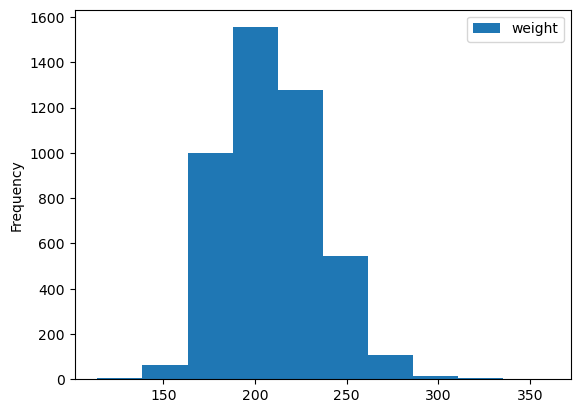

In [122]:
df.loc[:,['weight']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

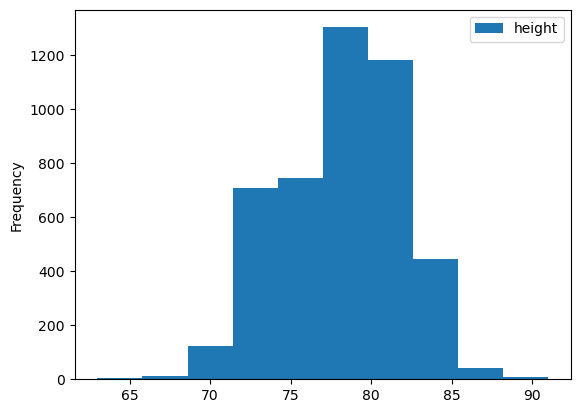

In [123]:
df.loc[:,['height']].plot.hist()

Let's inspect the outliers outside two standard deviations. Multiply the standard deviation by 2 and subtract/add from the mean respectively to get the lower and upper bounds. Then we can compose a condition to identify the outliers by checking for weights less than or greater than these lower and upper bounds respectively.

In [129]:
lower = mean - (2*std) 
upper = mean + (2*std) 
print(lower,upper)

outlier_condition = (df['weight'] < lower) | (upper < df['weight'])

df[outlier_condition]

156.42982316325174 261.4021243203369


,active_from,active_to,birth_date,height,weight,position
47,1992,2002,"August 31, 1969",81.0,265.0,C-F
68,1996,2003,"November 26, 1970",82.0,270.0,C-F
113,2005,2007,"August 12, 1980",83.0,280.0,C
116,1971,1984,"September 2, 1948",73.0,150.0,G
144,1947,1947,"May 18, 1916",70.0,137.0,G
...,...,...,...,...,...,...
4352,1950,1950,"December 12, 1926",69.0,155.0,G
4483,1999,1999,"January 7, 1974",84.0,275.0,C
4495,2001,2003,"September 30, 1973",82.0,270.0,F
4533,1994,1994,"September 22, 1971",86.0,270.0,C


Alright, but we want to remove the outliers. We can change that condition to only include elements that fall inside two standard deviations, not outside. Below we remove both of those weights and therefore have a dataframe with outliers removed exceeding two standard deviations. 

In [130]:
outliers_removed_df = df[(lower < df['weight']) & (df['weight'] < upper)]
outliers_removed_df

,active_from,active_to,birth_date,height,weight,position
0,1991,1995,"June 24, 1968",82.0,240.0,F-C
1,1969,1978,"April 7, 1946",81.0,235.0,C-F
2,1970,1989,"April 16, 1947",86.0,225.0,C
3,1991,2001,"March 9, 1969",73.0,162.0,G
4,1998,2003,"November 3, 1974",78.0,223.0,F
...,...,...,...,...,...,...
4570,2017,2018,"February 18, 1994",80.0,215.0,G-F
4571,2018,2018,"January 4, 1997",83.0,250.0,F-C
4572,1983,1983,"December 20, 1953",85.0,240.0,C
4573,1971,1971,"June 7, 1948",73.0,170.0,G


<AxesSubplot:ylabel='Frequency'>

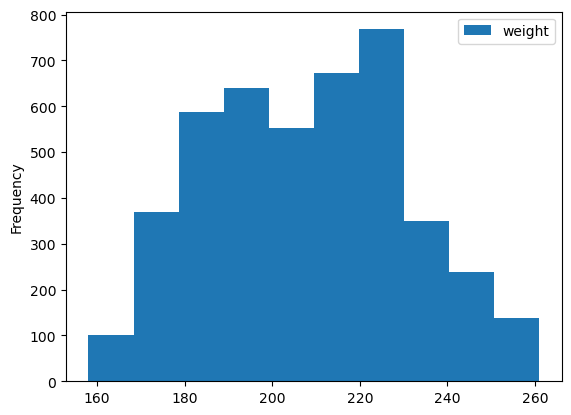

In [133]:
outliers_removed_df.loc[:,['weight']].plot.hist()

Note this is only for one dimension of data. You can also think of multi-dimensional distributions if you want to account for more than one field as outliers, such as both `weight` and `height`. Just be careful as the more dimensions you put into a distribution, the more sparse your data will become. Reasoning about outliers will become harder. 

## Interquartile Range Outliers

There is a lot of data that does not follow the nice bell curve shape of the normal distribution. Another way you can approach outliers in these cases is to use the Interquartile Range method, or IQR. This is the difference between the 75th and 25th percentile. When referring to the quarterly percentiles (0, 25, 50, 75, and 100). we refer to them as quartiles. A 50 percent quartile would be the middle-most value (the median), or the average of the two most-centered values. 

Using the IQR, you will define a cutoff by a factor $ k $ below or above the 25th and 75th percentile respectively. A common value for $ k $ is $ 1.5 $, whereas a value of $ 3.0 $ would be used for more extreme cutoffs. 

In Python, we can use the `percentile()` function in NumPy to find a given percentile in a datastet. Just be sure to remove `NaN` values as they will result in `NaN` values. 

In [ ]:
from numpy import percentile

q25 = percentile(df['weight'].dropna(), 25)
q75 = percentile(df['weight'].dropna(), 75)

q25, q75

Then you can calculate the difference between the 75th and 25th percentile to get the IQR. 

In [ ]:
iqr = q75 - q25
iqr

Let's say we wanted to use `k = 1.5` and calculate the cutoffs like this. 

In [ ]:
k = 1.5
cut_off = iqr * k
lower = q25 - cut_off
upper = q75 + cut_off

lower, upper

Finally, we can remove outliers that fall outside this range. 

In [ ]:
outliers_removed_df = df[(lower < df['weight']) & (df['weight'] < upper)]
outliers_removed_df

As you see above, we removed 50 records that were considered outliers by this metric. 

You can also use this technique on multidimensional data, by specifying an IQR policy for each field you want to target the removal of outliers. 

## Using LocalOutlierFactor

From a machine learning perspective, you can treat outliers as a classification. If they are far away from the rest of the datapoints in a multidimensional space, they can be detected as outliers. However, this becomes less reliable on higher dimensional problems due to curse of dimensionality. By leveraging logic that measures how far neighboring data points are, we can leverage the `LocalOutlierFactor`. 

Let's create a `LocalOutlierFactor` with the default settings and using `weight` and `height` as the variables. You can [find docs on this technique here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html). We will get a `-1` for every record that is deemed an outlier. 

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# drop NA values
df = df.dropna()

# LocalOutlierFactor
lof = LocalOutlierFactor()
outlier_ind = lof.fit_predict(df.loc[:,['weight','height']])

outlier_ind

Therefore, if we pass this series of booleans back to the dataframe, we can omit those 1092 records that are deemed outliers or have missing values. 

In [ ]:
df[outlier_ind != -1]

# Section 5 - Wrangling Text

When you think of data cleaning, one task that probably comes to mind is wrangling text. After all, when people enter data on a form or different formatting conventions are appended together, you will likely find yourself standardizing the data and trying to make it consistent. You will also seek values that were lost in translation and are unusable. 

In this section we will cover a variety of techniques to wrangle text and perform tasks like finding, replacing, and splitting values. Along the way, we will learn some regular expressions to perform pattern recognition in these tasks. 

We are going to learn how to perform some common text operations to clean this dataset and enforce some consistency. 

These are the common string operations in Pandas we can use. Note that these typically accept a regular expression as a pattern, and we will cover this. 

| Function   | Description                                                                 |
|------------|-----------------------------------------------------------------------------|
| `count()`    | Counts the number of instances in a pattern                                 |
| `contains()` | Returns a boolean True/False indicating whether a string contains a pattern |
| `replace()`  | Replaces the found patterns in a string with another specified string.      |
| `fullmatch()`    | Determines if the entire string matches the pattern                         |
| `split()`    | Splits a string into separate strings using the pattern as the separator    |
| `extract()`  | Finds all occurrences of a pattern and packages them into columns           |
| `findall()`  | Finds all occurrences of a pattern and packages them into a list            |

## Splitting Data into Columns

Let's look at the dataset below. Notice the `result` column.

In [ ]:
df = pd.read_csv(data_url)
df

Let's split that `result` into three columns by separating on the `-` and the `,`. We can do this simply using the `split()` function and passing an `expand` argument, as well as using a regular expression to capture both character separators. 

In [ ]:
split_results = df['result'].str.split("[-,]", expand=True, regex=True)
split_results

If you ever have used wildcards to search for text patterns, regular expressions are similar. **Regular expressions** are a special programming language specifically for matching complex text patterns. They allow matching, splitting, and replacing text based on a standardized pattern syntax. You can find them implemented in hundreds of platforms including Python, Java, and SQL. Even IDE's and text editors will allow you to search text using regular expressions such as VSCode, PyCharm, and Notepad++. They are so useful that Pandas makes them the default pattern convention for many of its aforementioned string methods. 

We learn more about regular expressions in the full Anaconda class on [Data Cleaning with Pandas](https://learning.anaconda.cloud/data-cleaning-with-pandas) You can also refer to Python's documentation on the `re` package here: https://docs.python.org/3/library/re.html. For a more thorough walkthrough on regular expressions, check out my article with O'Reilly: https://www.oreilly.com/content/an-introduction-to-regular-expressions/

For now, let's assign those three split columns back. 

In [ ]:
df['result'] = split_results.iloc[:,0]
df.insert(5, 'win', split_results.iloc[:,1])
df.insert(6, 'loss', split_results.iloc[:,2])
df

You can also use other functions to find and replace text patterns. 

## Dates and Times 

Being able to handle dates and times, particularly for time series applications, is a critical part of data-cleaning. It is easy to let subtle bugs creep in due to parsing dates and times incorrectly or not accounting for timezones. On rare occasion, you may encounter datasets coming from a system that bravely uses custom time types, like 27-hour clocks (yes, this happened to me!). The point is, working with dates and times can be messy so we will learn some practical strategies here. 

We will keep it simple today though, and you can get a more thorough coverage of dates and times in [Data Cleaning with Pandas](https://learning.anaconda.cloud/data-cleaning-with-pandas).


Let's extract one of the columns and look at its datatypes. Notice that it is a `dtype` of `object`, not a `datetime64` as we would want. 

In [ ]:
df['date']

We can have Pandas implicitly convert the date. 

In [ ]:
parsed_col = pd.to_datetime(df['date'])
parsed_col

We can also parse dates upon loading the data. 

In [ ]:
df_parsed = pd.read_csv(data_url, 
            parse_dates=['game_date','date'])

df_parsed.head(3)

Study the datetime formatting conventions for Python here. 

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

`strftime()` and `strptime()` are used to write a datetime to a formatting string, and parse a datetime from a formatted string respectively. The format codes come from the standard C conventions. Here are a few common ones, many of which we will use in this notebook. Refer to the link above to see all format codes. 

| Symbol | Description             | Parse Example: 2021-01-13 2:34PM |
|--------|-------------------------|----------------------------------|
| `%Y`     | 4-digit year            | 2021                               |
| `%y`     | 2-digit year            | 21                               |
| `%m`     | 2-digit month           | 01                               |
| `%d`     | 2-digit day of month    | 13                               |
| `%b`     | 3-letter month          | Jan                              |
| `%I`     | Hour for 12-hour clock  | 2                                |
| `%H`     | Hour for 24-hour clock  | 14                               |
| `%M`     | 2-digit minute          | 34                               |
| `%p`     | AM/PM for 12-hour clock | PM                               |
| `%S`     | 2-digit seconds         | 00                               |
| `%f`     | Microseconds            | 000000                           |
| `%a`     | 3-letter weekday        | Wed                              |
| `%A`     | Full name weekday       | Wednesday                        |

Sometimes you will need to be explicit on your date format. For example, you may need `%y` to get a two-digit year, a `%b` for the three-letter name of the month, and `%d` for the day of month. For the time we can use `%I` for the 12-hour clock hour, `%M` for the minute, and `%p` for the `AM/PM`. 

Below, we use an explicit convention to parse `date`. 

In [ ]:
df = pd.read_csv(data_url)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df